<a href="https://colab.research.google.com/github/Om-soni-15/Gurgaon-Real-Estate-Price-Prediction-Analytics-Platform/blob/master/Notebooks/Missing_Value_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Missing Value imputation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Gurgaon_properties_outelier_treated.csv')

In [ ]:
df=pd.read_csv('Gurgaon_properties_outelier_treated.csv')

In [ ]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,3
bathroom,0
balcony,0


<Axes: xlabel='Built_up_area', ylabel='Super_built_up_area'>

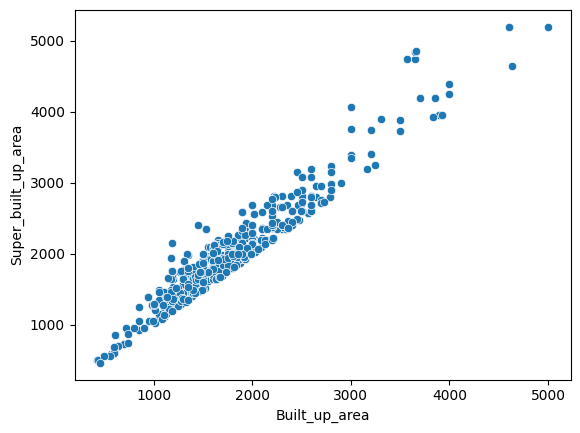

In [ ]:
sns.scatterplot(x=df['Built_up_area'],y=df['Super_built_up_area'])

<Axes: xlabel='Built_up_area', ylabel='Carpet_area'>

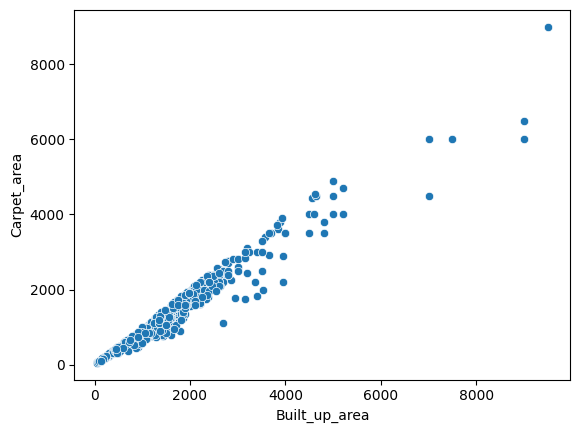

In [ ]:
sns.scatterplot(x=df['Built_up_area'],y=df['Carpet_area'])

<Axes: xlabel='Super_built_up_area', ylabel='Carpet_area'>

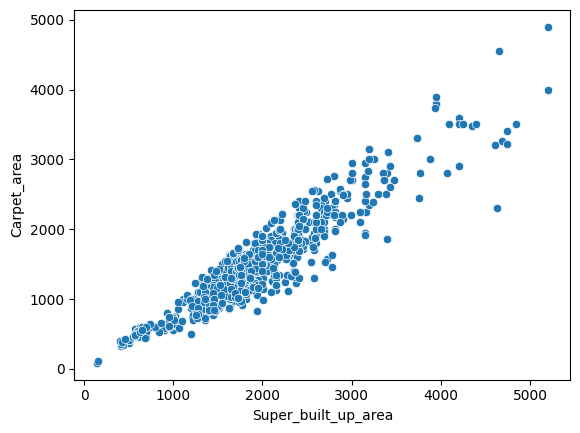

In [ ]:
sns.scatterplot(x=df['Super_built_up_area'],y=df['Carpet_area'])

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,bptp visionnaire,sector 70,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),2.0,4,4,3.0,North-East,New Property,2609.0,NaN,NaN,0,1,0,0,0,unfurnished,53
1,house,independent,sector 43,2.10,38251.0,549.0,Plot area 61(51 sq.m.),2.0,10,4,5.0,West,New Property,549.0,NaN,NaN,0,1,0,0,0,unfurnished,26
2,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),4.0,21,4,5.0,North,Relatively New,1161.0,NaN,NaN,0,1,0,0,0,semifurnished,53
3,house,independent,sector 43,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),2.0,12,4,5.0,West,New Property,558.0,NaN,NaN,0,0,0,0,1,semifurnished,26
4,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),5.0,20,4,4.0,East,Relatively New,1152.0,NaN,NaN,0,1,0,0,0,semifurnished,26


In [ ]:
all_present=df[~((df['Built_up_area'].isna()) |(df['Super_built_up_area'].isna()) | (df['Carpet_area'].isna()))]

In [ ]:
np.median(all_present['Built_up_area']/all_present['Super_built_up_area'])

0.9047898830507526

In [ ]:
np.median(all_present['Built_up_area']/all_present['Carpet_area'])

1.1109382562400607

In [ ]:
scp_df=df[(df['Built_up_area'].isna()) & ~(df['Super_built_up_area'].isna()) & ~(df['Carpet_area'].isna())]

In [ ]:
scp_df['Built_up_area'].fillna((scp_df['Super_built_up_area']*0.905 + scp_df['Carpet_area']*1.111)/2,inplace=True)

<ipython-input-21-d0c729a86194>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scp_df['Built_up_area'].fillna((scp_df['Super_built_up_area']*0.905 + scp_df['Carpet_area']*1.111)/2,inplace=True)
<ipython-input-21-d0c729a86194>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scp_df['Built_up_area'].fillna((scp_df['Super_built_up_area']*0.905 

In [ ]:
scp_df['Built_up_area']=scp_df['Built_up_area'].round()

<ipython-input-25-c3128e5bbaf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scp_df['Built_up_area']=scp_df['Built_up_area'].round()


In [ ]:
scp_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
746,flat,bhawna cghs,sector 43,3.25,10156.0,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet a...,0.0,4,4,12.0,NaN,Moderately Old,3114.0,3000.0,3200.0,0,0,0,1,0,semifurnished,150
751,flat,chintels paradiso,sector 109,1.80,8867.0,2030.0,Super Built up area 2030(188.59 sq.m.)Carpet a...,3.0,3,2,0.0,East,Moderately Old,1910.0,1785.0,2030.0,0,1,0,0,0,unfurnished,93
752,flat,breez global hill view,sohna road,0.30,5405.0,555.0,Super Built up area 655(60.85 sq.m.)Carpet are...,0.0,2,2,6.0,North-East,New Property,605.0,555.0,655.0,0,0,0,0,0,unfurnished,130
772,flat,silverglades the melia,sohna road,1.01,6999.0,1443.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,0.0,2,3,12.0,NaN,Under Construction,1184.0,950.0,1450.0,1,0,0,0,0,unfurnished,112
774,flat,umang winter hills,sector 77,0.99,7857.0,1260.0,Super Built up area 1260(117.06 sq.m.)Carpet a...,2.0,2,2,1.0,North,Relatively New,1126.0,1000.0,1260.0,0,0,0,0,0,unfurnished,105


In [ ]:
df.update(scp_df)

In [ ]:
df.Built_up_area.isnull().sum()

1523

In [ ]:
carpet_df=df[(df['Built_up_area'].isna()) & (df['Super_built_up_area'].isna()) & ~(df['Carpet_area'].isna())]

In [ ]:
Super_df = df[(df['Built_up_area'].isna()) & ~(df['Super_built_up_area'].isna()) & (df['Carpet_area'].isna())]

In [ ]:
carpet_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
52,house,independent,sector 14,4.50,20000.0,2250.0,Carpet area: 2500 (232.26 sq.m.),5.0,5,1,1.0,NaN,Relatively New,NaN,2500.0,NaN,0,0,0,0,0,unfurnished,0
123,house,independent,sector 105,0.35,7778.0,450.0,Carpet area: 500 (46.45 sq.m.),1.0,2,1,2.0,East,Undefined,NaN,500.0,NaN,0,0,0,0,0,unfurnished,0
138,house,independent,sector 2,5.00,15385.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6.0,6,2,1.0,South,Undefined,NaN,3250.0,NaN,0,0,0,0,0,unfurnished,0
143,house,independent,sector 13,2.25,6944.0,3240.0,Carpet area: 360 (301.01 sq.m.),10.0,10,2,1.0,East,Undefined,NaN,360.0,NaN,0,0,0,0,0,unfurnished,0
150,house,independent,sector 21,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3.0,2,1,1.0,NaN,Undefined,NaN,535.0,NaN,0,0,0,0,0,unfurnished,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,flat,m3m skywalk,sector 74,1.50,10714.0,1400.0,Carpet area: 1400 (130.06 sq.m.),0.0,2,1,8.0,NaN,New Property,NaN,1400.0,NaN,0,0,0,0,0,unfurnished,23
3473,flat,chanderlok society,sector 28,0.90,7235.0,1244.0,Carpet area: 1244 (115.57 sq.m.),4.0,2,4,1.0,NaN,Old Property,NaN,1244.0,NaN,0,0,0,0,0,unfurnished,0
3477,flat,uphar lakshya homes,sector 105,0.42,4200.0,1000.0,Carpet area: 1000 (92.9 sq.m.),3.0,2,1,1.0,East,Relatively New,NaN,1000.0,NaN,0,0,0,0,0,unfurnished,14
3481,flat,godrej oasis,sector 88,1.50,8108.0,1850.0,Carpet area: 1850 (171.87 sq.m.),1.0,3,2,3.0,NaN,Relatively New,NaN,1850.0,NaN,0,0,0,0,0,unfurnished,59


In [ ]:
carpet_df['Built_up_area'].fillna(round(carpet_df['Carpet_area']*1.111),inplace=True)

<ipython-input-39-0adc33fe73e5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carpet_df['Built_up_area'].fillna(round(carpet_df['Carpet_area']*1.111),inplace=True)
<ipython-input-39-0adc33fe73e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carpet_df['Built_up_area'].fillna(round(carpet_df['Carpet_area']*1.111),inplace=True)


In [ ]:
Super_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
720,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),0.0,2,3,5.0,NaN,Under Construction,NaN,NaN,1345.0,1,0,0,0,0,unfurnished,0
722,flat,the cocoon,dwarka expressway,2.00,13333.0,1500.0,Super Built up area 1500(139.35 sq.m.),1.0,3,3,5.0,NaN,New Property,NaN,NaN,1500.0,0,0,0,0,0,unfurnished,0
729,flat,godrej,sector 33,0.95,6859.0,1385.0,Super Built up area 1385(128.67 sq.m.),1.0,2,4,3.0,South-East,Under Construction,NaN,NaN,1385.0,0,0,0,0,0,unfurnished,0
730,flat,shree vardhman flora,sector 90,0.70,5385.0,1300.0,Super Built up area 1300(120.77 sq.m.),0.0,2,3,13.0,NaN,New Property,NaN,NaN,1300.0,1,0,0,0,0,unfurnished,20
734,flat,central park flower valley,sector 33,2.20,10476.0,2100.0,Super Built up area 2100(195.1 sq.m.),0.0,3,3,12.0,North-East,New Property,NaN,NaN,2100.0,0,1,0,0,0,unfurnished,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,flat,m3m woodshire,sector 107,1.40,5930.0,2361.0,Super Built up area 2361(219.34 sq.m.),3.0,4,0,1.0,East,New Property,NaN,NaN,2361.0,0,0,0,0,0,unfurnished,85
3488,flat,krishna appartment,sector 12,0.35,3500.0,1000.0,Super Built up area 1000(92.9 sq.m.),2.0,3,1,2.0,NaN,Old Property,NaN,NaN,1000.0,0,0,0,0,0,unfurnished,0
3491,flat,ansal heights 86,sector 86,1.05,5541.0,1895.0,Super Built up area 1895(176.05 sq.m.),0.0,3,3,9.0,North-East,Under Construction,NaN,NaN,1895.0,0,1,0,0,0,unfurnished,0
3493,flat,raheja vedaanta,sector 108,0.95,5214.0,1822.0,Super Built up area 1822(169.27 sq.m.),1.0,3,3,3.0,NaN,Relatively New,NaN,NaN,1822.0,0,0,0,0,1,unfurnished,105


In [ ]:
Super_df['Built_up_area'].fillna(round(Super_df['Super_built_up_area']*0.905),inplace=True)

<ipython-input-42-e5f30dc47fc1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Super_df['Built_up_area'].fillna(round(Super_df['Super_built_up_area']*0.905),inplace=True)
<ipython-input-42-e5f30dc47fc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Super_df['Built_up_area'].fillna(round(Super_df['Super_built_up_area']*0.905),inplace=True)

In [ ]:
df.update(Super_df)

In [ ]:
df.update(carpet_df)

In [ ]:
df.Built_up_area.isnull().sum()

0

In [ ]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,3
bathroom,0
balcony,0


<Axes: xlabel='Built_up_area', ylabel='price'>

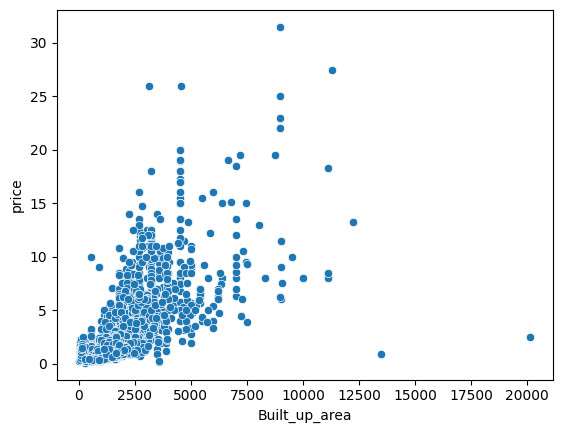

In [ ]:
sns.scatterplot(x=df['Built_up_area'],y=df['price'])

In [ ]:
anomly_df=df[(df['Built_up_area']<2000) & (df['price']>2.5)]

In [ ]:
anomly_df[['Built_up_area','area','price']].sample(10)

,Built_up_area,area,price
2076,1891.0,2576.0,2.70
1104,1833.0,1650.0,2.65
306,550.0,550.0,10.00
681,162.0,1458.0,3.80
1011,1869.0,2395.0,3.65
2519,1894.0,2093.0,2.51
646,1350.0,1350.0,4.50
561,1900.0,1800.0,2.80
2835,1869.0,1869.0,3.45
506,1835.0,1836.0,3.60


In [ ]:
anomly_df['Built_up_area'] = anomly_df['area']

<ipython-input-58-8cd81bbd0cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomly_df['Built_up_area'] = anomly_df['area']


In [ ]:
df.update(anomly_df)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,Carpet_area,Super_built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,bptp visionnaire,sector 70,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),2.0,4,4,3.0,North-East,New Property,2609.0,NaN,NaN,0,1,0,0,0,unfurnished,53
1,house,independent,sector 43,2.10,38251.0,549.0,Plot area 61(51 sq.m.),2.0,10,4,5.0,West,New Property,549.0,NaN,NaN,0,1,0,0,0,unfurnished,26
2,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),4.0,21,4,5.0,North,Relatively New,1161.0,NaN,NaN,0,1,0,0,0,semifurnished,53
3,house,independent,sector 43,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),2.0,12,4,5.0,West,New Property,558.0,NaN,NaN,0,0,0,0,1,semifurnished,26
4,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),5.0,20,4,4.0,East,Relatively New,1152.0,NaN,NaN,0,1,0,0,0,semifurnished,26


In [ ]:
df.drop(columns=['area','areaWithType','Super_built_up_area','Carpet_area'],inplace=True)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,bptp visionnaire,sector 70,5.25,20115.0,2.0,4,4,3.0,North-East,New Property,2609.0,0,1,0,0,0,unfurnished,53
1,house,independent,sector 43,2.10,38251.0,2.0,10,4,5.0,West,New Property,549.0,0,1,0,0,0,unfurnished,26
2,house,independent,sector 54,5.00,43066.0,4.0,21,4,5.0,North,Relatively New,1161.0,0,1,0,0,0,semifurnished,53
3,house,independent,sector 43,3.00,53763.0,2.0,12,4,5.0,West,New Property,558.0,0,0,0,0,1,semifurnished,26
4,house,independent,sector 43,4.50,39062.0,5.0,20,4,4.0,East,Relatively New,1152.0,0,1,0,0,0,semifurnished,26


In [ ]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,2
bathroom,0
balcony,0
floorNum,2
facing,966


In [ ]:
df[df['society'].isna()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [ ]:
df.drop(index=3269,inplace=True)

In [ ]:
df[df['floorNum'].isna()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
310,house,jacob pura,sector 12,0.35,9722.0,NaN,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,unfurnished,0
883,flat,experion heartsong,dwarka expressway,1.08,6150.0,NaN,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,unfurnished,0


In [ ]:
df.loc[310]['floorNum']= 1
df.loc[833]['floorNum']= 7


<ipython-input-90-435ddacd1d33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[310]['floorNum']= 1
<ipython-input-90-435ddacd1d33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[833]['floorNum']= 7


In [ ]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,2
bathroom,0
balcony,0
floorNum,2
facing,966


In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1603
New Property,568
Moderately Old,532
Old Property,270
Undefined,265
Under Construction,257


In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,bptp visionnaire,sector 70,5.25,20115.0,2.0,4,4,3.0,North-East,New Property,2609.0,0,1,0,0,0,unfurnished,53
1,house,independent,sector 43,2.10,38251.0,2.0,10,4,5.0,West,New Property,549.0,0,1,0,0,0,unfurnished,26
2,house,independent,sector 54,5.00,43066.0,4.0,21,4,5.0,North,Relatively New,1161.0,0,1,0,0,0,semifurnished,53
3,house,independent,sector 43,3.00,53763.0,2.0,12,4,5.0,West,New Property,558.0,0,0,0,0,1,semifurnished,26
4,house,independent,sector 43,4.50,39062.0,5.0,20,4,4.0,East,Relatively New,1152.0,0,1,0,0,0,semifurnished,26


In [ ]:
df.groupby('sector')['agePossession'].agg(lambda x: x.mode().iloc[0])

,agePossession
sector,
arju,Relatively New
dwarka expressway,Under Construction
gwal pahari,New Property
laxma,Moderately Old
manesar,Moderately Old
...,...
sector 92,Relatively New
sector 93,Relatively New
sector 95,New Property


In [ ]:
temp=df[df['agePossession']=='Undefined']

In [ ]:
df

sector             property_type
arju               house                Relatively New
dwarka expressway  flat             Under Construction
gwal pahari        flat                   New Property
laxma              flat                 Relatively New
                   house                Moderately Old
                                           ...        
sector 93          flat                 Relatively New
sector 95          flat                   New Property
sector 99          flat                   New Property
sohna road         flat                 Relatively New
                   house                  New Property
Name: agePossession, Length: 143, dtype: object

In [ ]:
temp

In [ ]:
def mode_value(row):
  if row['agePossession']=='Undefined':
    return (df[(df['sector']==row['sector']) & (df['property_type']== row['property_type'])]['agePossession'].mode()).iloc[0]
  else:
    return row['agePossession']

In [ ]:
df['agePossession'] = df.apply(mode_value,axis=1)

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1737
New Property,599
Moderately Old,587
Old Property,297
Under Construction,275


In [ ]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [ ]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,2
bathroom,0
balcony,0
floorNum,2
facing,966


In [ ]:
df[df['bedRoom'].isna()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
310,house,jacob pura,sector 12,0.35,9722.0,NaN,1,0,1.0,NaN,Old Property,360.0,0,0,0,0,0,unfurnished,0
883,flat,experion heartsong,dwarka expressway,1.08,6150.0,NaN,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,unfurnished,0


In [ ]:
df.loc[310, 'floorNum'] = 1
df.loc[883, 'floorNum'] = 7

In [ ]:
df.loc[310,'bedRoom'] = 1
df.loc[883,'bedRoom'] = 4


In [ ]:
df.isna().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
facing,966


In [ ]:
def mode_value(row):
  if row['facing'].isna():
    return (df[(df['sector']==row['sector']) & (df['property_type']== row['property_type'])]['facing'].mode()).iloc[0]
  else:
    return row['facing']

In [ ]:
df['facing'].fillna((df[(df['sector']==row['sector']) & (df['property_type']== row['property_type'])]['facing'].mode()).iloc[0])

AttributeError: 'str' object has no attribute 'isna'

In [ ]:
df.groupby(['sector', 'property_type'])['facing'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x)

sector             property_type
arju               house                                           East
dwarka expressway  flat             [nan, nan, nan, nan, nan, nan, nan]
gwal pahari        flat                                      North-East
laxma              flat                                            East
                   house                                           East
                                                   ...                 
sector 93          flat                                           North
sector 95          flat                                           North
sector 99          flat                                      North-East
sohna road         flat                                            East
                   house                                          North
Name: facing, Length: 143, dtype: object

In [ ]:
df['facing'].value_counts()

,count
facing,
East,602
North-East,600
North,370
West,239
South,226
North-West,179
South-East,166
South-West,147


In [ ]:
df['facing']=df.groupby(['sector', 'property_type'])['facing'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))

<ipython-input-148-fe9e9f670b7d>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['facing']=df.groupby(['sector', 'property_type'])['facing'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))


In [ ]:
df['facing'].value_counts()

,count
facing,
East,1106
North-East,890
North,469
West,257
South,242
North-West,192
South-East,168
South-West,154


In [ ]:
df['facing'].fillna('East',inplace=True)

<ipython-input-151-95d9dcce34e4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('East',inplace=True)


In [ ]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
facing,0


In [ ]:
df.shape

(3495, 19)

In [ ]:
df.to_csv('Gurgaon_properties_missing_treated.csv',index=False)

### Feature Selction


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Gurgaon_properties_missing_treated.csv')

In [ ]:
train_df = df.drop(columns=['society','price_per_sqft'])


In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 70,5.25,2.0,4,4,3.0,North-East,New Property,2609.0,0,1,0,0,0,unfurnished,53
1,house,sector 43,2.10,2.0,10,4,5.0,West,New Property,549.0,0,1,0,0,0,unfurnished,26
2,house,sector 54,5.00,4.0,21,4,5.0,North,Relatively New,1161.0,0,1,0,0,0,semifurnished,53
3,house,sector 43,3.00,2.0,12,4,5.0,West,New Property,558.0,0,0,0,0,1,semifurnished,26
4,house,sector 43,4.50,5.0,20,4,4.0,East,Relatively New,1152.0,0,1,0,0,0,semifurnished,26


<Axes: ylabel='luxury_score'>

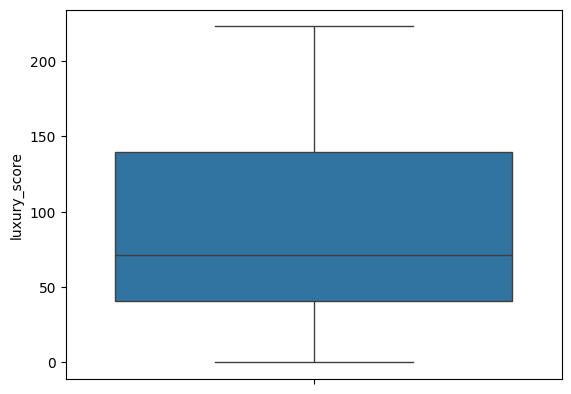

In [ ]:
sns.boxplot(df['luxury_score'])


In [ ]:
from sklearn.cluster import KMeans
x= df['luxury_score'].values.reshape(-1,1)


In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

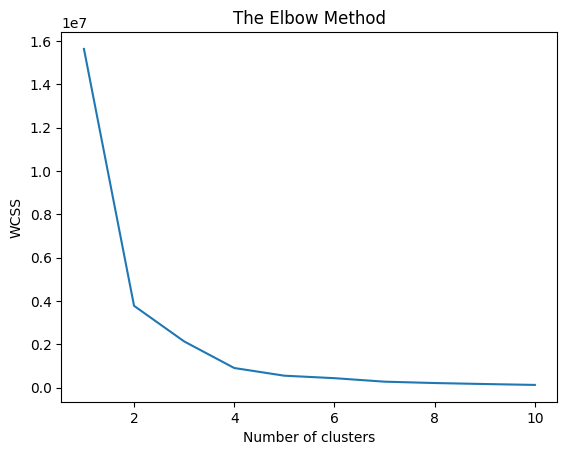

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [ ]:
# silihoite score
from sklearn.metrics import silhouette_score
silhouette_score(x,y_kmeans)

0.61577236891992

In [ ]:
df['facilities'] = y_kmeans

In [ ]:
df.sample(10)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,facilities
1953,flat,shree kirpalu gi sector 52,sector 52,1.45,7632.0,0.0,3,4,7.0,West,Relatively New,1800.0,0,0,0,0,1,semifurnished,146,0
2619,flat,shree vardhman victoria,sector 70,1.75,8204.0,0.0,5,3,7.0,North-East,New Property,1527.0,0,1,0,1,0,unfurnished,40,1
759,flat,dlf new town heights,sector 90,1.99,7297.0,0.0,4,4,9.0,East,Relatively New,3030.0,0,1,0,1,0,semifurnished,131,0
2497,flat,godrej summit,sector 104,0.75,5910.0,0.0,2,3,6.0,East,Relatively New,1148.0,0,0,0,0,1,unfurnished,96,0
2184,flat,ss,sector 85,2.17,7717.0,1.0,4,3,7.0,North,Relatively New,2600.0,1,1,0,1,0,unfurnished,46,1
3169,flat,godrej,sector 79,2.00,8453.0,2.0,4,4,2.0,North-East,Relatively New,2629.0,0,1,0,0,0,semifurnished,172,3
474,house,luxury dlf city floors,sector 26,8.25,45833.0,3.0,12,4,4.0,North,New Property,1800.0,0,1,0,0,0,furnished,115,0
417,house,international city by sobha phase 2,sector 109,9.50,26389.0,2.0,5,4,2.0,South,Relatively New,3599.0,1,1,1,1,0,unfurnished,152,0
21,house,independent,sector 25,7.60,38756.0,2.0,9,3,4.0,East,Relatively New,1961.0,1,0,1,1,0,semifurnished,89,1
3167,flat,spaze privvy the address,sector 93,1.25,6898.0,0.0,4,2,12.0,North-East,Relatively New,1350.0,0,0,0,0,0,furnished,104,0


In [ ]:
df['facilities']= df['facilities'].astype(str)

In [ ]:
df['facilities']=df['facilities'].str.replace('0','premium')
df['facilities']=df['facilities'].str.replace('1','standard')
df['facilities']=df['facilities'].str.replace('2','basic')
df['facilities']=df['facilities'].str.replace('3','luxury')

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,facilities
0,house,bptp visionnaire,sector 70,5.25,20115.0,2.0,4,4,3.0,North-East,New Property,2609.0,0,1,0,0,0,unfurnished,53,standard
1,house,independent,sector 43,2.10,38251.0,2.0,10,4,5.0,West,New Property,549.0,0,1,0,0,0,unfurnished,26,basic
2,house,independent,sector 54,5.00,43066.0,4.0,21,4,5.0,North,Relatively New,1161.0,0,1,0,0,0,semifurnished,53,standard
3,house,independent,sector 43,3.00,53763.0,2.0,12,4,5.0,West,New Property,558.0,0,0,0,0,1,semifurnished,26,basic
4,house,independent,sector 43,4.50,39062.0,5.0,20,4,4.0,East,Relatively New,1152.0,0,1,0,0,0,semifurnished,26,basic


In [ ]:
df.drop(columns=['luxury_score'],inplace=True)

In [ ]:
df['facilities'].value_counts()

,count
facilities,
standard,1294
premium,778
basic,769
luxury,654


In [ ]:
# 3 --> luxury
# 2 --> basic
# 1 --> standard
# 0 --> premium

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,facilities
0,house,bptp visionnaire,sector 70,5.25,20115.0,2.0,4,4,3.0,North-East,New Property,2609.0,0,1,0,0,0,unfurnished,standard
1,house,independent,sector 43,2.10,38251.0,2.0,10,4,5.0,West,New Property,549.0,0,1,0,0,0,unfurnished,basic
2,house,independent,sector 54,5.00,43066.0,4.0,21,4,5.0,North,Relatively New,1161.0,0,1,0,0,0,semifurnished,standard
3,house,independent,sector 43,3.00,53763.0,2.0,12,4,5.0,West,New Property,558.0,0,0,0,0,1,semifurnished,basic
4,house,independent,sector 43,4.50,39062.0,5.0,20,4,4.0,East,Relatively New,1152.0,0,1,0,0,0,semifurnished,basic


In [ ]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [ ]:
df['floor_category']= df['floorNum'].apply(categorize_floor)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,facilities,floor_category
0,house,bptp visionnaire,sector 70,5.25,20115.0,2.0,4,4,3.0,North-East,New Property,2609.0,0,1,0,0,0,unfurnished,standard,Mid Floor
1,house,independent,sector 43,2.10,38251.0,2.0,10,4,5.0,West,New Property,549.0,0,1,0,0,0,unfurnished,basic,Mid Floor
2,house,independent,sector 54,5.00,43066.0,4.0,21,4,5.0,North,Relatively New,1161.0,0,1,0,0,0,semifurnished,standard,Mid Floor
3,house,independent,sector 43,3.00,53763.0,2.0,12,4,5.0,West,New Property,558.0,0,0,0,0,1,semifurnished,basic,Mid Floor
4,house,independent,sector 43,4.50,39062.0,5.0,20,4,4.0,East,Relatively New,1152.0,0,1,0,0,0,semifurnished,basic,Mid Floor


In [ ]:
df.drop(columns=['floorNum'],inplace=True)

In [ ]:
df.drop(columns=['society','price_per_sqft','study room','pooja room','others'],inplace=True)

In [ ]:
df.to_csv('Gurgaon_properties_post_feature_selection_V2.csv',index=False)

In [ ]:
train_df.loc[2694]

,2694
property_type,flat
sector,sector 67
price,1.3
bedRoom,2.0
bathroom,2
balcony,2
floorNum,-1.0
facing,North
agePossession,Relatively New
Built_up_area,1296.0


In [ ]:
num_cols=train_df.select_dtypes(include=np.number).columns


<Axes: >

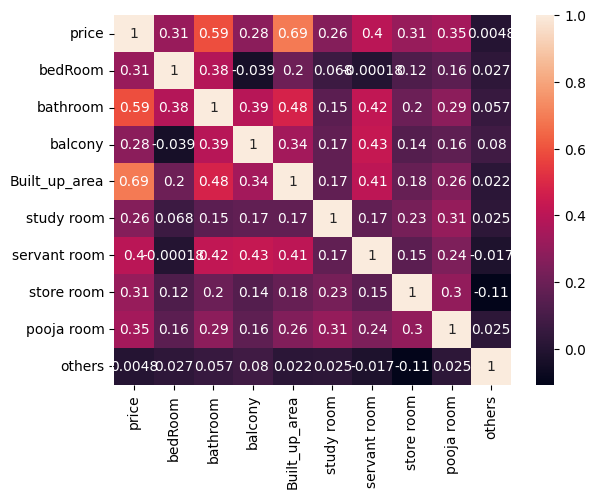

In [ ]:
sns.heatmap(train_df[num_cols].corr(),annot=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['arju', 'dwarka expressway', 'gwal pahari', 'laxma', 'manesar',
       'maruti kunj', 'mehrauli gurgao', 'sector 1', 'sector 10',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 11', 'sector 110', 'sector 111', 'sector 112',
       'sector 113', 'sector 12', 'sector 13', 'sector 14', 'sector 17',
       'sector 2', 'sector 21', 'sector 22', 'sector 23', 'sector 24',
       'sector 25', 'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 30', 'sector 31', 'sector 33', 'sector 36', 'sector 37',
       'sector 38', 'sector 39', 'sector 4', 'sector 40', 'sector 41',
       'sector 43', 'sector 45', 'sector 46', 'sector 47', 'sector 48',
       'sector 49', 'sector 5', 'sector 50', 'sector 51', 'sector 52',
       'sector 53', 'sector 54', 'sector 55', 'sector 56', 'sector 57',
       'sector 58', 'sector 59', 'sector 6', 'sector 60', 's

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,bptp visionnaire,sector 70,5.25,20115.0,2.0,4,4,3.0,North-East,New Property,2609.0,0,1,0,0,0,unfurnished,53
1,house,independent,sector 43,2.10,38251.0,2.0,10,4,5.0,West,New Property,549.0,0,1,0,0,0,unfurnished,26
2,house,independent,sector 54,5.00,43066.0,4.0,21,4,5.0,North,Relatively New,1161.0,0,1,0,0,0,semifurnished,53
3,house,independent,sector 43,3.00,53763.0,2.0,12,4,5.0,West,New Property,558.0,0,0,0,0,1,semifurnished,26
4,house,independent,sector 43,4.50,39062.0,5.0,20,4,4.0,East,Relatively New,1152.0,0,1,0,0,0,semifurnished,26


In [ ]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,facing,agePossession,Built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,facilities,floorNum_category
0,1.0,74.0,2.0,4,4,2.0,1.0,2609.0,0,1,0,0,0,2.0,3.0,2.0
1,1.0,46.0,2.0,10,4,7.0,1.0,549.0,0,1,0,0,0,2.0,0.0,2.0
2,1.0,57.0,4.0,21,4,1.0,3.0,1161.0,0,1,0,0,0,1.0,3.0,2.0
3,1.0,46.0,2.0,12,4,7.0,1.0,558.0,0,0,0,0,1,1.0,0.0,2.0
4,1.0,46.0,5.0,20,4,0.0,3.0,1152.0,0,1,0,0,0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3490,0.0,89.0,0.0,3,3,2.0,4.0,1715.0,0,1,0,0,0,2.0,0.0,2.0
3491,0.0,50.0,1.0,5,4,3.0,2.0,3305.0,0,1,0,0,0,2.0,3.0,2.0
3492,0.0,15.0,1.0,3,3,0.0,3.0,1649.0,0,0,0,0,1,2.0,2.0,2.0
3493,0.0,30.0,0.0,4,4,2.0,2.0,3700.0,1,1,0,1,1,1.0,3.0,2.0


In [ ]:
y_label

,price
0,5.25
1,2.10
2,5.00
3,3.00
4,4.50
...,...
3490,1.05
3491,3.30
3492,0.95
3493,5.80


In [ ]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.196896
1,price,1.000000
2,bedRoom,0.314252
3,bathroom,0.592450
4,balcony,0.279860
5,facing,0.031262
6,agePossession,-0.145341
7,Built_up_area,0.688599
8,study room,0.262865
9,servant room,0.401834


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
7,Built_up_area,0.592097
0,property_type,0.138535
1,sector,0.112098
3,bathroom,0.049158
9,servant room,0.019978
14,facilities,0.012761
5,facing,0.012497
6,agePossession,0.011323
2,bedRoom,0.011220
8,study room,0.010455


## Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
7,Built_up_area,0.636376
0,property_type,0.129397
1,sector,0.109872
3,bathroom,0.071608
9,servant room,0.028830
2,bedRoom,0.010104
8,study room,0.003736
13,furnishing_type,0.002031
6,agePossession,0.001801
14,facilities,0.001623


## permutation_importance

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30)
# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
7,Built_up_area,0.628135
0,property_type,0.239318
1,sector,0.125842
3,bathroom,0.042217
9,servant room,0.022330
2,bedRoom,0.005704
4,balcony,0.005166
6,agePossession,0.004989
14,facilities,0.002938
10,store room,0.001488


## lasso


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
7,Built_up_area,1.317930
0,property_type,0.782352
3,bathroom,0.515672
10,store room,0.206758
9,servant room,0.205476
8,study room,0.204899
14,facilities,0.152380
11,pooja room,0.102949
15,floorNum_category,-0.000000
2,bedRoom,-0.006894


In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
7,Built_up_area,0.590455
0,property_type,0.134670
1,sector,0.115448
3,bathroom,0.047728
9,servant room,0.018612
5,facing,0.014010
14,facilities,0.013271
2,bedRoom,0.013008
6,agePossession,0.011418
8,study room,0.010748


In [ ]:
from sklearn.linear_model import LinearRegression

# Train a linear regression models
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
7,Built_up_area,1.323272
0,property_type,0.790333
3,bathroom,0.531384
8,study room,0.212665
9,servant room,0.211021
10,store room,0.210629
14,facilities,0.165614
11,pooja room,0.106848
15,floorNum_category,-0.009032
2,bedRoom,-0.031772


In [ ]:
!pip install SHAP

In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 1.53962483, -0.30387239,  0.00819595, ...,  0.00508362,
         0.04118403,  0.05308552],
       [ 0.70809928,  0.32973359, -0.00577067, ...,  0.00298722,
        -0.03187203,  0.00526389],
       [ 0.9244626 ,  0.58937303,  0.0387462 , ...,  0.02504057,
         0.11522613, -0.00349782],
       ...,
       [-0.24982038, -0.28993733, -0.01491564, ..., -0.01608656,
         0.01285483, -0.02801665],
       [-1.28552242,  0.31594009,  0.00659331, ...,  0.06127869,
         0.06345402,  0.05996401],
       [-0.53810704,  1.71758854,  0.12250832, ...,  0.06710186,
         0.02122646,  0.03232159]])

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
7,Built_up_area,1.235079
0,property_type,0.564161
1,sector,0.410519
3,bathroom,0.187156
9,servant room,0.100797
4,balcony,0.034831
14,facilities,0.034172
8,study room,0.030287
6,agePossession,0.025230
2,bedRoom,0.021603


In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')


In [ ]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.196896,0.112098,0.109872,0.125842,-0.039869,0.115448,-0.049952,0.410519
bedRoom,0.314252,0.011220,0.010104,0.005704,-0.006894,0.013008,-0.031772,0.021603
bathroom,0.592450,0.049158,0.071608,0.042217,0.515672,0.047728,0.531384,0.187156
balcony,0.279860,0.009545,0.000825,0.005166,-0.036561,0.009616,-0.062884,0.034831
facing,0.031262,0.012497,0.000290,-0.002206,-0.027269,0.014010,-0.036961,0.020461
agePossession,-0.145341,0.011323,0.001801,0.004989,-0.024154,0.011418,-0.032784,0.025230
Built_up_area,0.688599,0.592097,0.636376,0.628135,1.317930,0.590455,1.323272,1.235079
study room,0.262865,0.010455,0.003736,-0.005805,0.204899,0.010748,0.212665,0.030287
servant room,0.401834,0.019978,0.028830,0.022330,0.205476,0.018612,0.211021,0.100797


In [ ]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)


In [ ]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


,0
feature,
Built_up_area,0.685698
sector,0.146218
bathroom,0.066364
servant room,0.030259
bedRoom,0.011304
facilities,0.010268
agePossession,0.009215
balcony,0.009091
facing,0.007564


In [ ]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()


0.6643551745636319

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

0.6705637969109531

In [ ]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [ ]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [ ]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,facing,agePossession,Built_up_area,servant room,store room,furnishing_type,facilities,floorNum_category,price
0,1.0,74.0,2.0,4,4,2.0,1.0,2609.0,1,0,2.0,3.0,2.0,5.25
1,1.0,46.0,2.0,10,4,7.0,1.0,549.0,1,0,2.0,0.0,2.0,2.10
2,1.0,57.0,4.0,21,4,1.0,3.0,1161.0,1,0,1.0,3.0,2.0,5.00
3,1.0,46.0,2.0,12,4,7.0,1.0,558.0,0,0,1.0,0.0,2.0,3.00
4,1.0,46.0,5.0,20,4,0.0,3.0,1152.0,1,0,1.0,0.0,2.0,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3490,0.0,89.0,0.0,3,3,2.0,4.0,1715.0,1,0,2.0,0.0,2.0,1.05
3491,0.0,50.0,1.0,5,4,3.0,2.0,3305.0,1,0,2.0,3.0,2.0,3.30
3492,0.0,15.0,1.0,3,3,0.0,3.0,1649.0,0,0,2.0,2.0,2.0,0.95
3493,0.0,30.0,0.0,4,4,2.0,2.0,3700.0,1,0,1.0,3.0,2.0,5.80


### Baseline Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('gurgaon_properties_post_feature_selection.csv')

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,facing,agePossession,Built_up_area,servant room,store room,furnishing_type,facilities,floorNum_category,price
0,1.0,74.0,2.0,4,4,2.0,1.0,2609.0,1,0,2.0,3.0,2.0,5.25
1,1.0,46.0,2.0,10,4,7.0,1.0,549.0,1,0,2.0,0.0,2.0,2.10
2,1.0,57.0,4.0,21,4,1.0,3.0,1161.0,1,0,1.0,3.0,2.0,5.00
3,1.0,46.0,2.0,12,4,7.0,1.0,558.0,0,0,1.0,0.0,2.0,3.00
4,1.0,46.0,5.0,20,4,0.0,3.0,1152.0,1,0,1.0,0.0,2.0,4.50


In [ ]:
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'facilities', 'floorNum_category']

<ipython-input-9-0f415a98584e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='price', ylabel='Density'>

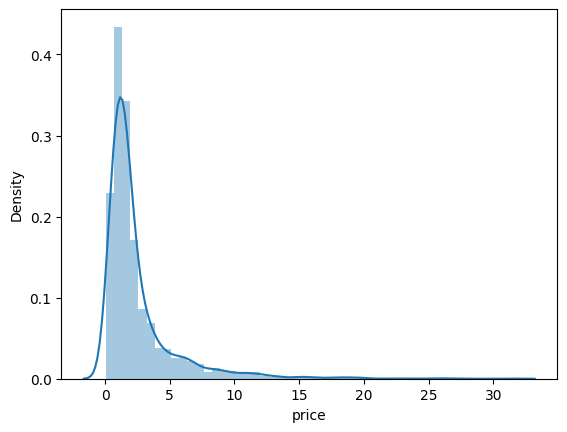

In [ ]:
sns.distplot(y)

In [ ]:
y_transformed = np.log1p(y)


<ipython-input-13-ca5f85232404>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_transformed


<Axes: xlabel='price', ylabel='Density'>

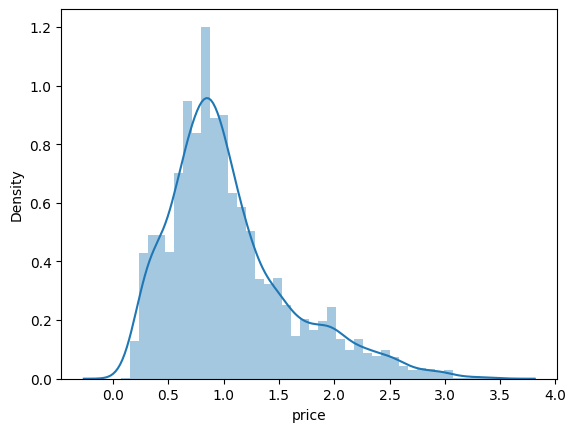

In [ ]:
sns.distplot(y_transformed)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'Built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columns_to_encode)
    ],
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2',error_score='raise')

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
scores.mean()


0.891406617783643

In [ ]:
scores.std()

0.015961923187982435

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)


In [ ]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'Built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'facilities',
                                                   'floorNum_category'])])),
                ('reg...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(np.expm1(y_test),np.expm1(y_pred)))


0.6716284091431793


In [ ]:
r2_score(np.expm1(y_test),np.expm1(y_pred))

0.8332027125381338